[[8.42765010e+04 4.00000000e-02]
 [8.42766970e+04 8.00000000e-03]
 [8.42768920e+04 3.10000000e-02]
 ...
 [1.14996082e+05 5.00000000e-03]
 [1.14998231e+05 2.00000000e-03]
 [1.14998427e+05 2.00000000e-03]]


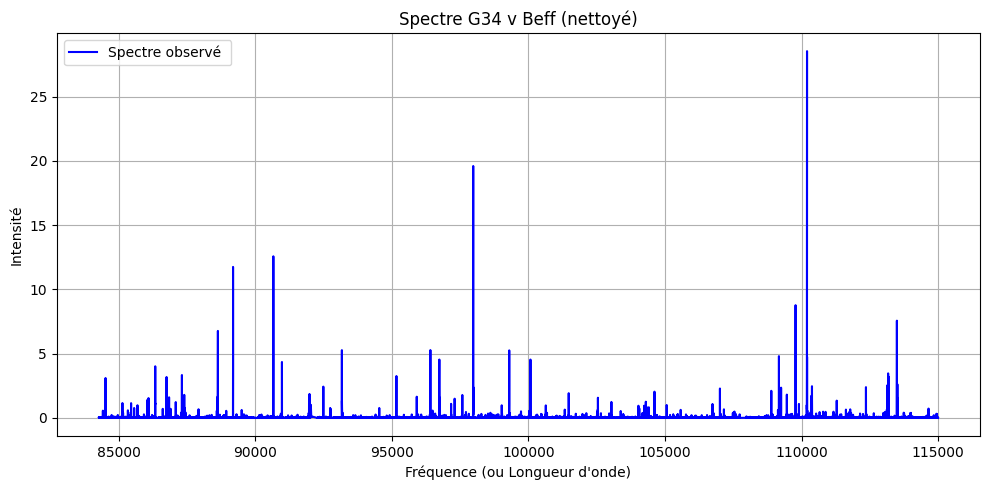

In [46]:
import numpy as np
import matplotlib.pyplot as plt


file_path = '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/raw/complete_spectrum_G34_v_Beff.dat'
spectrum_data = np.loadtxt(file_path)



x = spectrum_data[:, 0] 
y = spectrum_data[:, 1] 


mask = y > 0
x_clean = x[mask]
y_clean = y[mask]


spectrum = np.column_stack((x_clean, y_clean))

print(spectrum)

plt.figure(figsize=(10, 5))
plt.plot(spectrum[:,0], spectrum[:,1], label='Spectre observé ', color='blue')
plt.xlabel('Fréquence (ou Longueur d\'onde)')
plt.ylabel('Intensité')
plt.title('Spectre G34 v Beff (nettoyé)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:


# # Lissage du spectre

# from scipy.signal import savgol_filter

# def normalize_spectrum(intensity):
#     intensity = np.nan_to_num(intensity, nan=0.0)  
#     if np.all(intensity == intensity[0]): 
#         return np.zeros_like(intensity)
    
#     mean = np.mean(intensity)
#     std = np.std(intensity)
#     return (intensity - mean) / std


# def estimate_noise_from_empty_channels(intensity, threshold=0.01):
    
#     noise_indices = np.where(intensity < threshold)[0]
    
#     if len(noise_indices) == 0:
#         print("Aucune zone sans signal détectée.")
#         return None, None

  
#     noise_intensity = intensity[noise_indices]
    
   
#     mean_noise = np.mean(noise_intensity)
#     std_noise = np.std(noise_intensity)
    
#     return mean_noise, std_noise



# num_segments = 5
# segment_length = len(y_clean) // num_segments



# for i in range(num_segments):
#     start = i * segment_length
#     end = (i + 1) * segment_length if i < num_segments - 1 else len(y_clean)
#     # Extraction du segment
#     x_segment = x_clean[start:end]
#     y_segment = y_clean[start:end]

#     # Normalisation du spectre
#     y_segment = normalize_spectrum(y_segment)
    
    
#     # Application du filtre médian sur chaque segment
#     mean_noise_before, std_noise_before = estimate_noise_from_empty_channels(y_segment, threshold=0.01)
#     print(f"Bruit avant filtrage : moyenne = {mean_noise_before:.4f}, écart-type = {std_noise_before:.4f}")

#     # Appliquer débruitage ondelettes + savgol
    
#     y_final = savgol_filter(y_segment, window_length=5, polyorder=2)


#     noise = y_segment - y_final
    
#     # Calcul des puissances
#     signal_power = np.mean(y_final ** 2)
#     noise_power = np.mean(noise ** 2)

#     if noise_power > 0:
#         snr = 10 * np.log10(signal_power / noise_power)
#     else:
#         snr = np.inf 

#     print(f"Segment {i+1}/{num_segments}: SNR = {snr:.2f} dB")
    

#     mean_noise_after, std_noise_after = estimate_noise_from_empty_channels(y_final, threshold=0.01)
#     print(f"Bruit après filtrage : moyenne = {mean_noise_after:.4f}, écart-type = {std_noise_after:.4f}")

#     # Tracer le spectre avant et après le filtrage
#     plt.figure(figsize=(10, 5))
#     plt.plot(x_segment, y_segment, label='Spectre avant filtrage', color='blue', alpha=0.5)
#     plt.plot(x_segment, y_final, label='Spectre après filtrage', color='red')
#     plt.xlabel('Fréquence (ou Longueur d\'onde)')
#     plt.ylabel('Intensité')
#     plt.title(f'Spectre G34 v Beff (Segment {i+1})')
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()


   






350000 350000
[ 80000.1         80000.2         80000.3        ... 114999.80052154
 114999.90052154 115000.00052154]


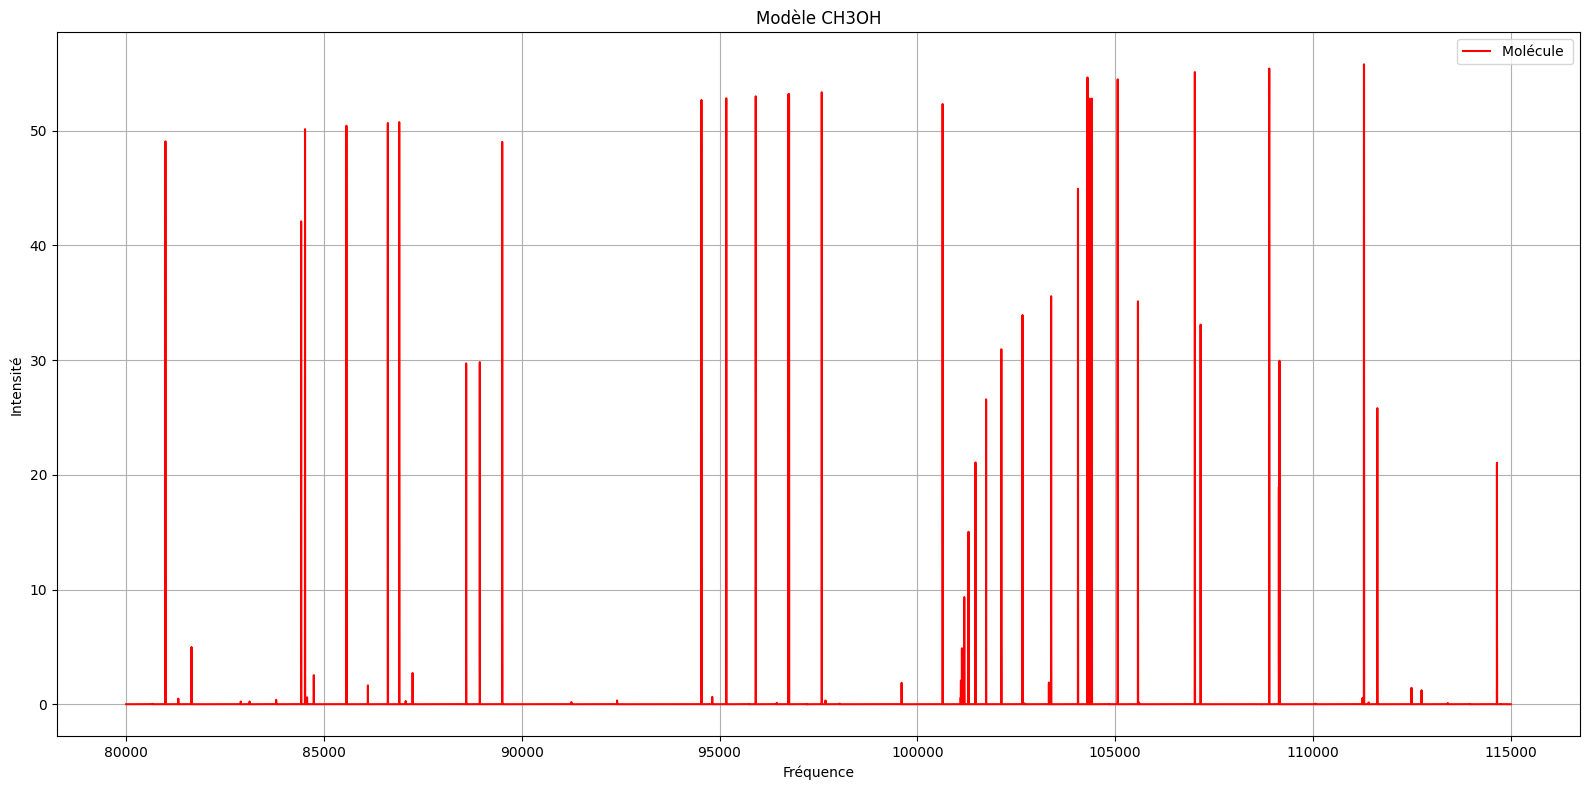

In [48]:
import numpy as np
import matplotlib.pyplot as plt






molecule_file_path = {'CH3OH': '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/molecule/Model_CH3OH.dat', # méthanol
                      'Formamide': '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/molecule/Model_formamide.dat' # formamide
                      # 'CH3COCH3': '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/molecule/acetone.txt', # acétone
                      # 'C2H5OH': '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/molecule/ethanol.txt', # éthanol
                      # 'C2H5CN': '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/molecule/ecian.txt', # ethyl cyanide
                      # 'n-C3H7CN': '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/molecule/pcia.txt', # propyl cyanide
                      # 'C2H3CN': '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/molecule/vcian.txt', # vinyl cyanide
                      # 'CH3OCHO': '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/molecule/mf.txt', # methyl formare
                      # 'CH3OCH3': '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/molecule/dme.txt', # dimethyl ether
                      # 'CH2(OH)CHO': '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/molecule/ga.txt', # glycolaldehyde
                      # 'NH2CN': '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/molecule/nh2cn.txt', # cyanamide
                      # 'CH3CHO': '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/molecule/ch3cho.txt', # acetaldehyde
                      # 'CH2NH': '/net/cremi/flgrenier/espaces/travail/STAGE_ANALYSIS/Astro_IA/src/data/molecule/ch2nh.txt', # methanimine

                      } 

molecule_name = 'CH3OH'
file_path = molecule_file_path[molecule_name]


molecule_data = np.loadtxt(file_path)






freq_model = molecule_data[:, 0]
intensity_model = molecule_data[:, 1]

print(len(freq_model), len(intensity_model))

spectre_model = np.column_stack((freq_model, intensity_model))

print(freq_model)


plt.figure(figsize=(16, 8))
plt.plot(spectre_model[:,0], spectre_model[:,1], label=f'Molécule ', color='red')
plt.xlabel('Fréquence')
plt.ylabel('Intensité')
plt.title(f'Modèle CH3OH')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




        




71422
350000
[1.36703004e-03 2.45364366e-04 1.05156157e-03 ... 1.40208209e-04
 3.50520523e-05 3.50520523e-05]


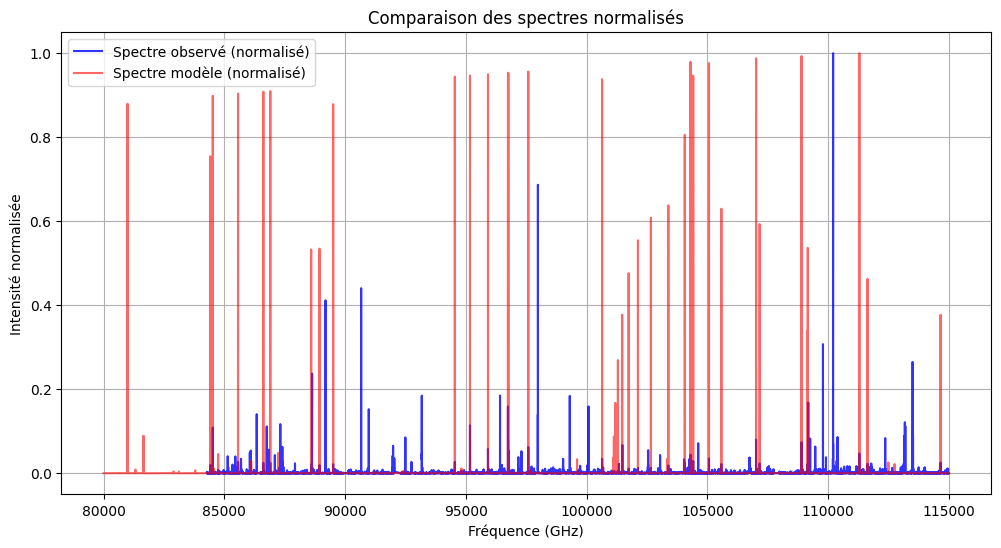

In [49]:



def normalize_spectrum(intensity):
    min_val = np.min(intensity)
    max_val = np.max(intensity)
    return (intensity - min_val) / (max_val - min_val) if (max_val - min_val) != 0 else intensity

spectrum_norm = normalize_spectrum(spectrum[:, 1])

print(len(spectrum[:,0]))
print(len(spectre_model[:,0]))

print(spectrum_norm)


spectrum_model_norm = normalize_spectrum(spectre_model[:, 1])


plt.figure(figsize=(12, 6))
plt.plot(spectrum[:, 0], spectrum_norm, label='Spectre observé (normalisé)', color='blue', alpha=0.8)
plt.plot(spectre_model[:, 0], spectrum_model_norm, label='Spectre modèle (normalisé)', color='red', alpha=0.6)
plt.xlabel('Fréquence (GHz)')
plt.ylabel('Intensité normalisée')
plt.title('Comparaison des spectres normalisés')
plt.legend()
plt.grid(True)
plt.show()

Segment 1/1 : Traitement du segment.


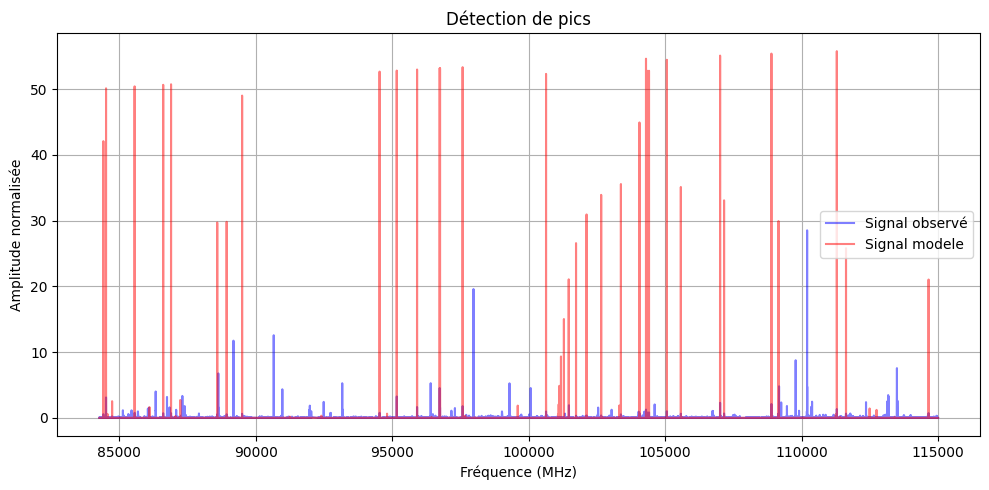

Seuil de détection : 0.1233 (sigma = 5)


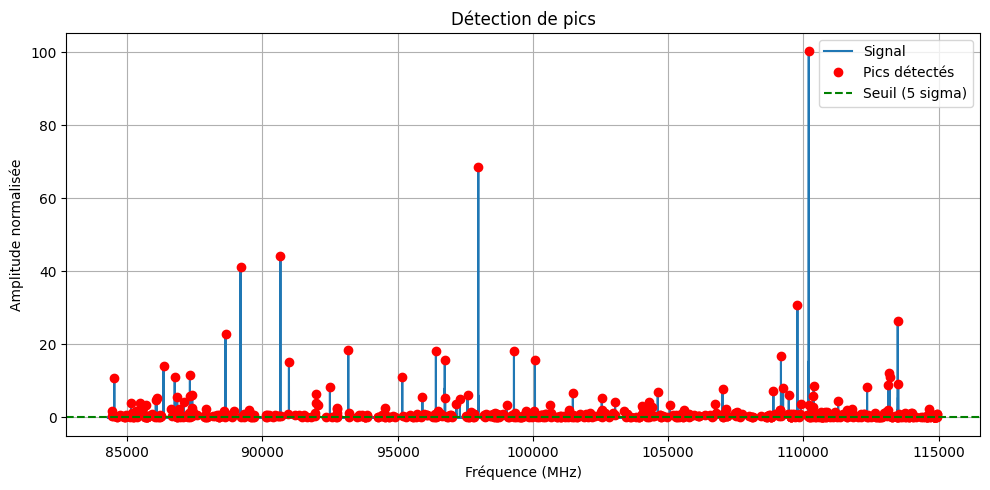

Seuil de détection : 0.0086 (sigma = 5)
Fréquences des pics modélisés : [ 84423.90006372  84522.00006371  84573.9000637   84744.10006369
  85568.40006362  86111.60006357  86615.70006353  86903.0000635
  87066.90006349  87241.30006347  88594.90006335  88940.10006332
  89506.00006327  91254.90006312  92409.60006302  94541.90006283
  94815.20006281  95170.20006278  95915.00006271  96756.10006264
  97583.50006257  97678.30006256  99602.00006239 100639.0000623
 101097.20006226 101101.90006226 101127.00006226 101185.60006225
 101293.50006224 101469.90006223 101737.40006221 102122.90006217
 102658.30006213 103325.40006207 103381.40006206 104060.700062
 104300.40006198 104336.80006198 104354.90006198 104410.60006197
 105063.90006192 105576.50006187 107014.70006174 107160.00006173
 108894.70006158 109138.90006156 109153.30006156 111254.30006137
 111289.80006137 111626.60006134 112491.10006127 112745.20006124
 114651.00006108]


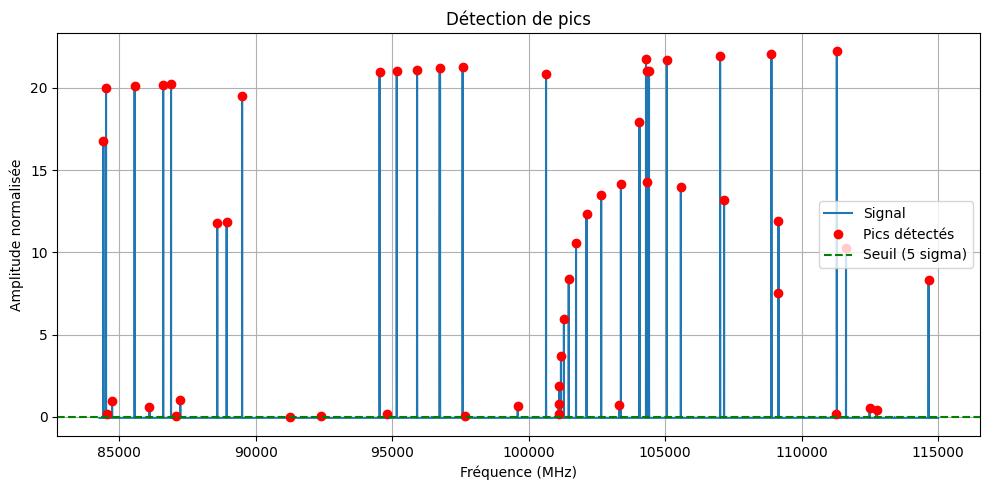

Correlation max : 600900144407.8129
Décalage (MHz) : 54.800000
Seuil de détection : 0.0086 (sigma = 5)
Vecteur binaire observé : [0 0 0 ... 0 0 0]
Vecteur binaire modélisé : [0 0 0 ... 0 0 0]


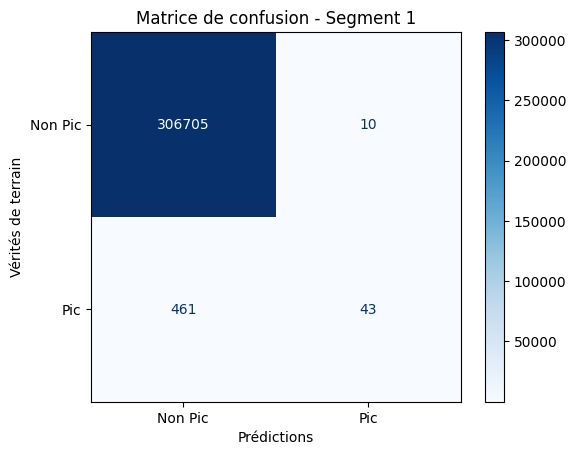

Précision : 0.8113
Rappel : 0.0853
F1-score : 0.1544
Paires de pics matchés (43):
Pic observé à 84423.800064 MHz ↔ modèle à 84423.900064 MHz
SAM = 0.000000, Ratio = 0.999999, Euclidean_distance = 0.100000
Pic observé à 84521.300064 MHz ↔ modèle à 84522.000064 MHz
SAM = 0.000000, Ratio = 0.999992, Euclidean_distance = 0.700000
Pic observé à 84744.000064 MHz ↔ modèle à 84744.100064 MHz
SAM = 0.000000, Ratio = 0.999999, Euclidean_distance = 0.100000
Pic observé à 85568.000064 MHz ↔ modèle à 85568.400064 MHz
SAM = 0.000000, Ratio = 0.999995, Euclidean_distance = 0.400000
Pic observé à 86615.500064 MHz ↔ modèle à 86615.700064 MHz
SAM = 0.000000, Ratio = 0.999998, Euclidean_distance = 0.200000
Pic observé à 86902.900064 MHz ↔ modèle à 86903.000064 MHz
SAM = 0.000000, Ratio = 0.999999, Euclidean_distance = 0.100000
Pic observé à 87241.500063 MHz ↔ modèle à 87241.300063 MHz
SAM = 0.000000, Ratio = 1.000002, Euclidean_distance = 0.200000
Pic observé à 88594.800063 MHz ↔ modèle à 88594.900063 MH

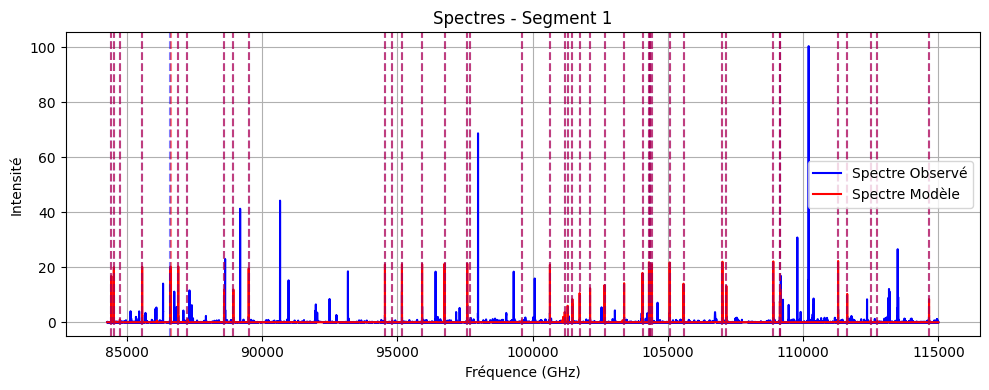

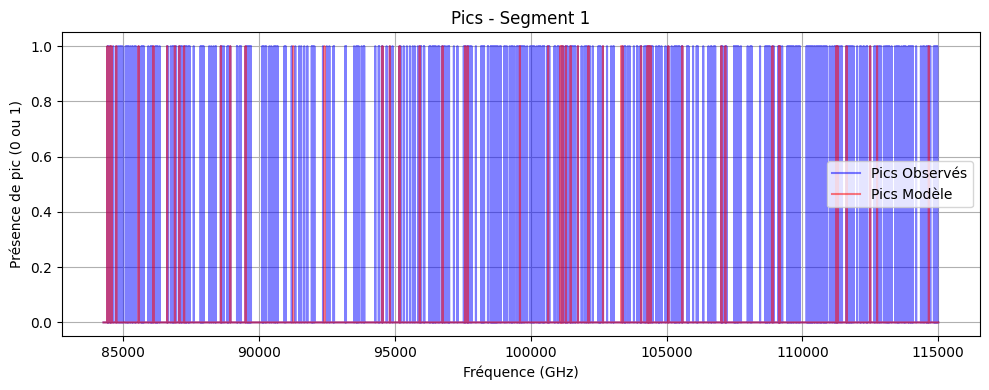


Résultats pour la molécule CH3OH:
Fichier CSV 'résultats_segments_CH3OH.csv' généré avec succès.
Fichier CSV 'résultats_binaire_CH3OH.csv' généré avec succès.
Vecteur binaire observé :  [0 0 0 ... 0 0 0]
Vecteur binaire modélisé :  [0 0 0 ... 0 0 0]
Segment 1/1 : Traitement du segment.


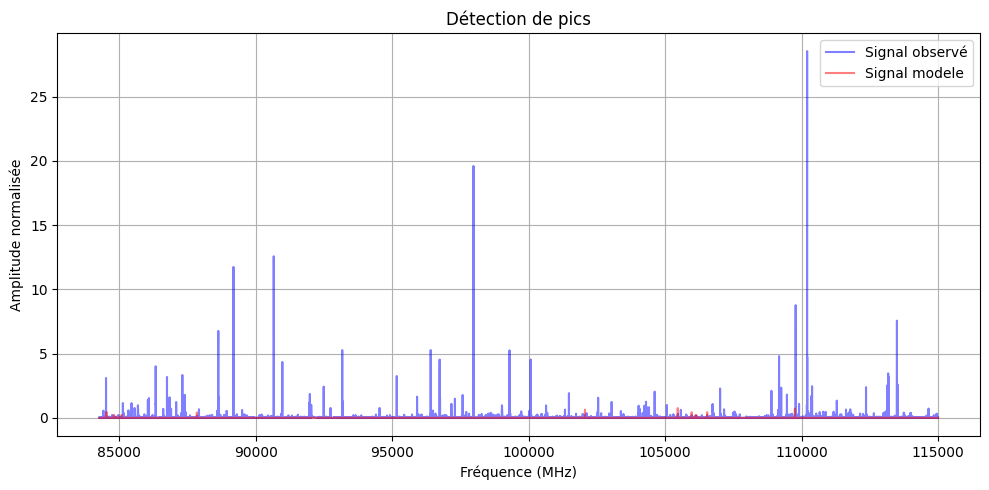

Seuil de détection : 0.1233 (sigma = 5)


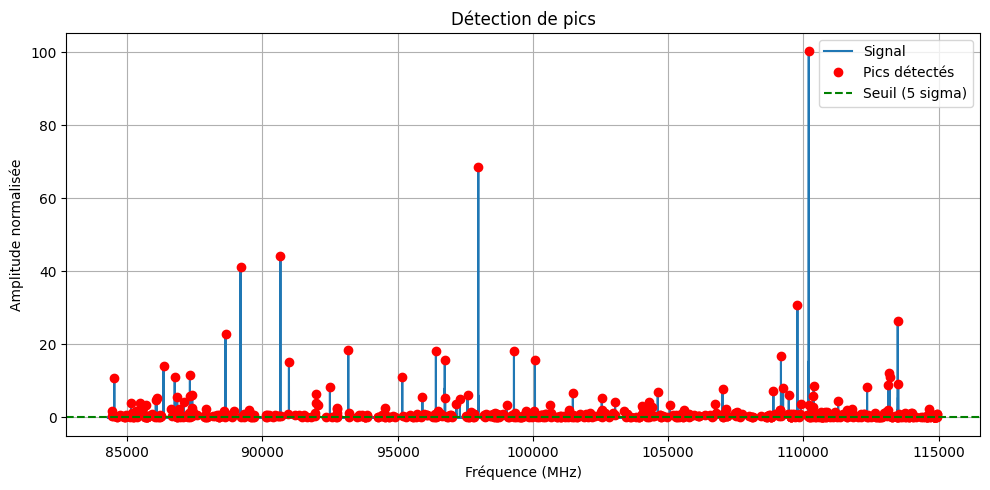

Seuil de détection : 0.0035 (sigma = 5)
Fréquences des pics modélisés : [ 84542.40006371  84807.90006368  84889.10006368  85093.40006366
  86382.90006355  87849.00006342  88225.50006339  92435.80006302
  93871.80006289  94247.60006286  94313.70006285  99346.80006241
 100572.40006231 102019.70006218 102064.40006218 102217.70006216
 103524.30006205 105331.70006189 105464.30006188 105972.70006184
 106108.00006182 106134.50006182 106141.50006182 106541.80006179
 109406.80006154 109753.60006151 112654.20006125 114304.40006111]


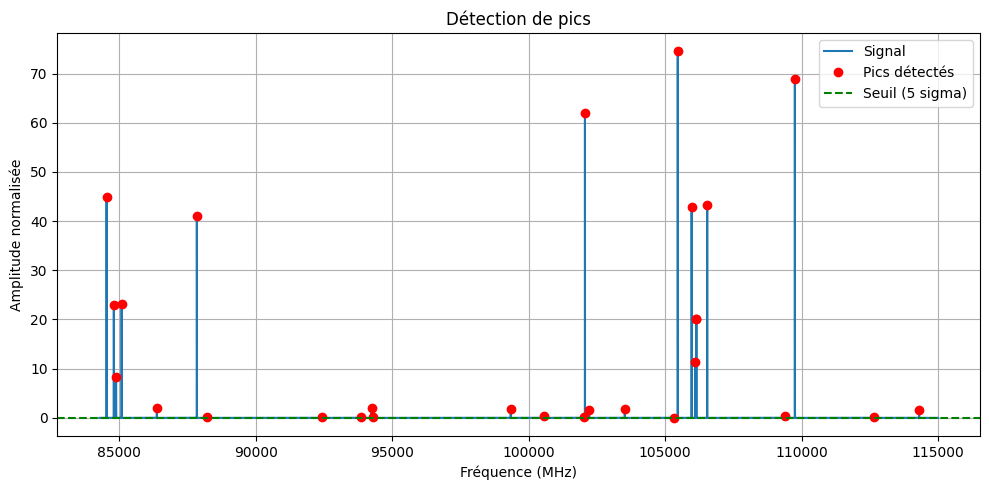

Correlation max : 318524863319.78
Décalage (MHz) : 57.300000
Seuil de détection : 0.0035 (sigma = 5)
Vecteur binaire observé : [0 0 0 ... 0 0 0]
Vecteur binaire modélisé : [0 0 0 ... 0 0 0]


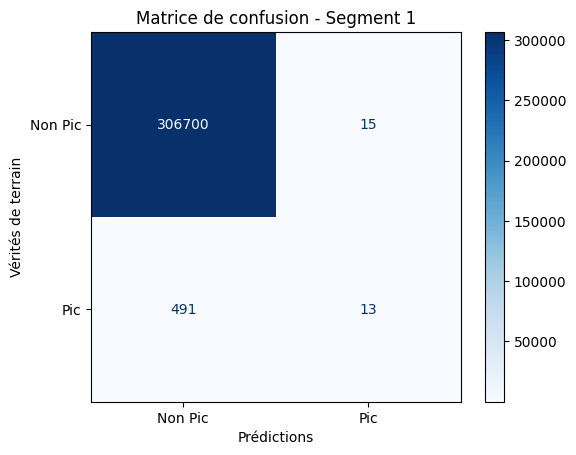

Précision : 0.4643
Rappel : 0.0258
F1-score : 0.0489
Paires de pics matchés (13):
Pic observé à 84542.800064 MHz ↔ modèle à 84542.400064 MHz
SAM = 0.000000, Ratio = 1.000005, Euclidean_distance = 0.400000
Pic observé à 84808.300064 MHz ↔ modèle à 84807.900064 MHz
SAM = 0.000000, Ratio = 1.000005, Euclidean_distance = 0.400000
Pic observé à 85093.600064 MHz ↔ modèle à 85093.400064 MHz
SAM = 0.000000, Ratio = 1.000002, Euclidean_distance = 0.200000
Pic observé à 87849.600063 MHz ↔ modèle à 87849.000063 MHz
SAM = 0.000000, Ratio = 1.000007, Euclidean_distance = 0.600000
Pic observé à 93870.100063 MHz ↔ modèle à 93871.800063 MHz
SAM = 0.000000, Ratio = 0.999982, Euclidean_distance = 1.700000
Pic observé à 102064.600062 MHz ↔ modèle à 102064.400062 MHz
SAM = 0.000000, Ratio = 1.000002, Euclidean_distance = 0.200000
Pic observé à 105464.600062 MHz ↔ modèle à 105464.300062 MHz
SAM = 0.000000, Ratio = 1.000003, Euclidean_distance = 0.300000
Pic observé à 105973.500062 MHz ↔ modèle à 105972.700

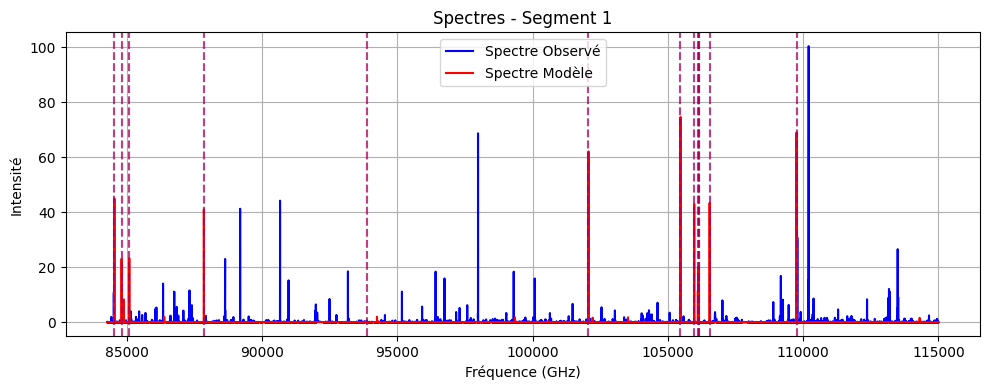

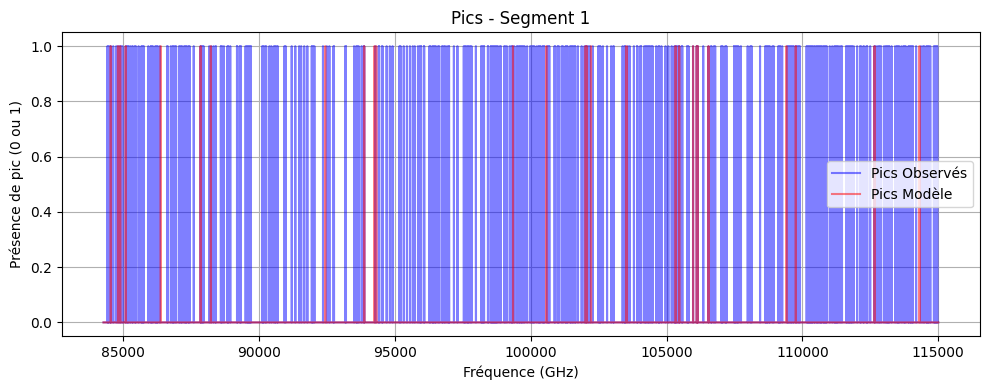


Résultats pour la molécule Formamide:
Fichier CSV 'résultats_segments_Formamide.csv' généré avec succès.
Fichier CSV 'résultats_binaire_Formamide.csv' généré avec succès.
Vecteur binaire observé :  [0 0 0 ... 0 0 0]
Vecteur binaire modélisé :  [0 0 0 ... 0 0 0]

Fichier 'résumé_scores.csv' généré avec succès.


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from scipy.signal import savgol_filter
from scipy.ndimage import uniform_filter1d
from scipy.signal import correlate
from scipy.interpolate import interp1d
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score



# Prétraitement du spectre

def normalize_spectrum(intensity):
    intensity = np.nan_to_num(intensity, nan=0.0)  
    if np.all(intensity == intensity[0]): 
        return np.zeros_like(intensity)
    
    mean = np.mean(intensity)
    std = np.std(intensity)
    return (intensity - mean) / std


def estimate_noise_from_empty_channels(intensity, threshold=0.01):
    
    noise_indices = np.where(intensity < threshold)[0]
    
    if len(noise_indices) == 0:
        print("Aucune zone sans signal détectée.")
        return None, None

  
    noise_intensity = intensity[noise_indices]
    
   
    mean_noise = np.mean(noise_intensity)
    std_noise = np.std(noise_intensity)
    
    return mean_noise, std_noise


def compute_local_width(signal, peak_index, threshold):

    left = peak_index

    while left > 0 and signal[left] > threshold:
        left -= 1

    right = peak_index
    while right < len(signal) - 1 and signal[right] > threshold:
        right += 1

    return right - left



def merge_peaks_locally(candidates, signal, threshold):
    if not candidates:
        return []

    merged = []
    i = 0
    while i < len(candidates):
        current = candidates[i]
        current_width = compute_local_width(signal, current, threshold)
        j = i + 1

     
        while j < len(candidates) and candidates[j] - current < current_width:
            if signal[candidates[j]] > signal[current]:
                current = candidates[j]
                current_width = compute_local_width(signal, current, threshold)
            j += 1

        merged.append(current)
        i = j

    return merged


def detect_peaks(signal, noise_rms, sigma_factor=5, smoothing_window= 5):

  

    smoothed = savgol_filter(signal, window_length=smoothing_window, polyorder=3)
    # smoothed = uniform_filter1d(signal, size=smoothing_window)

    smoothed = signal
    threshold = sigma_factor * noise_rms

    print(f"Seuil de détection : {threshold:.4f} (sigma = {sigma_factor})")

    candidates = []
    for i in range(1, len(smoothed) - 1):
        if (smoothed[i] > smoothed[i-1] and
            smoothed[i] > smoothed[i+1] and
            smoothed[i] > threshold):
            candidates.append(i)

    merged_peaks = merge_peaks_locally(candidates, smoothed, threshold)

    return merged_peaks, threshold, sigma_factor


    

def binary_peaks(peak_indices, freq):
    binary_vector = np.zeros_like(freq, dtype=int)
    binary_vector[peak_indices] = 1
    return binary_vector

def expand_binary_vector(binary_vector, freq, MHz_window=2.0):

    expanded_vector = np.zeros_like(binary_vector)
    freq = np.array(freq)
    peak_indices = np.where(binary_vector == 1)[0]

    for idx in peak_indices:
        f_center = freq[idx]
        indices_in_window = np.where(np.abs(freq - f_center) <= MHz_window)[0]
        expanded_vector[indices_in_window] = 1

    return expanded_vector


def group_indices(indices):
    if len(indices) == 0:
        return []
    groups = []
    current_group = [indices[0]]
    for idx in indices[1:]:
        if idx == current_group[-1] + 1:
            current_group.append(idx)
        else:
            groups.append(current_group)
            current_group = [idx]
    groups.append(current_group)
    return groups


def refine_all_to_centers_aligned(binary_vector_obs, binary_vector_model):
    import numpy as np

    refined_obs = np.zeros_like(binary_vector_obs)
    refined_model = np.zeros_like(binary_vector_model)

    obs_indices = np.where(binary_vector_obs == 1)[0]
    model_indices = np.where(binary_vector_model == 1)[0]

    obs_groups = group_indices(obs_indices)
    model_groups = group_indices(model_indices)

    used_model = set()

    for og in obs_groups:
        matched = False
        for i, mg in enumerate(model_groups):
            if set(og) & set(mg):  # chevauchement
                intersection = sorted(set(og) & set(mg))
                center = intersection[len(intersection) // 2]  # centre de l'intersection
                refined_obs[center] = 1
                refined_model[center] = 1
                used_model.add(i)
                matched = True
                break
        if not matched:
            center_obs = og[len(og) // 2]
            refined_obs[center_obs] = 1

    for i, mg in enumerate(model_groups):
        if i not in used_model:
            center_model = mg[len(mg) // 2]
            refined_model[center_model] = 1

    return refined_obs, refined_model

   


# Fonctions de similarité
 

def euclidean_distance(a, b):
    a, b = np.array(a), np.array(b)
    return np.linalg.norm(a - b)


def spectral_angle_mapper(a, b):
    a = np.array(a)
    b = np.array(b)

    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)

    if norm_a == 0 or norm_b == 0:
        return np.pi / 2 

    cos_sim = dot_product / (norm_a * norm_b)
    cos_sim = np.clip(cos_sim, -1.0, 1.0) 

    return np.degrees(np.arccos(cos_sim))



# mesure de similarité entre les pics observés et modélisés

def calculate_frequency_similarity(f_obs, f_model, eps=1e-6):
    f_obs = float(f_obs)
    f_model = float(f_model)

    if abs(f_model) < eps:
        return {
            'SAM_cosine': np.nan,
            'Ratio': np.nan,
            'Euclidean_distance': np.nan
        }

    distance_euclidienne = euclidean_distance([f_obs], [f_model])
    cosine_sim = spectral_angle_mapper([f_obs], [f_model])
    ratio = f_obs / f_model

    return {
        'SAM_cosine': cosine_sim,
        'Ratio': ratio,
        'Euclidean_distance': distance_euclidienne
    }



def ratio_peaks_model(matched_pairs, peak_freqs_model_aligné):
    if len(peak_freqs_model_aligné) == 0 and len(matched_pairs) == 0:
        return 0
    else :
        return len(matched_pairs) / len(peak_freqs_model_aligné)
    
def tanimoto_coefficient(a, b):
    a = np.array(a)
    b = np.array(b)
    dot_product = np.dot(a, b)
    norm_a = np.dot(a, a)
    norm_b = np.dot(b, b)
    den = norm_a + norm_b - dot_product
    return dot_product / den if den != 0 else 0

def pearson_correlation(a, b):
    a = np.array(a)
    b = np.array(b)

    if len(a) != len(b):
        raise ValueError("Les vecteurs doivent avoir la même longueur.")

    mean_a = np.mean(a)
    mean_b = np.mean(b)

    numerator = np.sum((a - mean_a) * (b - mean_b))
    denominator = np.sqrt(np.sum((a - mean_a) ** 2) * np.sum((b - mean_b) ** 2))

    return numerator / denominator if denominator != 0 else 0


def jaccard_similarity(a, b):
    a = np.array(a)
    b = np.array(b)

    intersection = np.sum(np.logical_and(a, b))
    union = np.sum(np.logical_or(a, b))

    return intersection / union if union != 0 else 0


def match_peaks(peak_freqs_obs, peak_freqs_model, tol_MHz=2.0):
   
    matched_pairs = []
    used_obs = set()

    for f_model in peak_freqs_model:
        for f_obs in peak_freqs_obs:
            if f_obs in used_obs:
                continue  
            if abs(f_model - f_obs) <= tol_MHz:
                matched_pairs.append((f_obs, f_model))
                used_obs.add(f_obs)
                break 

    return matched_pairs



# Alignement des pics

def correlate_peak_frequencies(freq_obs, peaks_obs, peaks_model):
    """Correlate observed and model peak frequencies."""
    if len(peaks_obs) == 0 or len(peaks_model) == 0:
        return 0, 0
    corr = correlate(peaks_obs, peaks_model, mode='full')
    lags = np.arange(-len(peaks_model) + 1, len(peaks_obs))
    max_corr = np.max(corr)
    best_shift = lags[np.argmax(corr)]
    shift_ghz = best_shift * (freq_obs[1] - freq_obs[0])
    return max_corr, shift_ghz










# === Traitement par segments ===

def process_spectrum_segments(spectrum, spectre_model, num_segments, nom_molecule):

    segment_length = len(spectrum) // num_segments
    

    
    all_matched_pairs = []
    results = []
    binary_results = []

    segments_obs = np.array_split(spectrum, num_segments)
    for i, segment in enumerate(segments_obs):


        
        print(f"Segment {i + 1}/{num_segments} : Traitement du segment.")
       
        start_idx = i * segment_length
        end_idx = (i + 1) * segment_length if i < num_segments - 1 else len(spectrum)

        freq_segment_obs = spectrum[start_idx:end_idx, 0]
        intensity_segment_obs = spectrum[start_idx:end_idx, 1]

       
        mask_model = (spectre_model[:, 0] >= freq_segment_obs[0]) & (spectre_model[:, 0] <= freq_segment_obs[-1])
        freq_segment_model = spectre_model[mask_model, 0]
        intensity_segment_model = spectre_model[mask_model, 1]


      


        

        delta_f_obs = np.min(np.diff(freq_segment_obs))
        delta_f_model = np.min(np.diff(freq_segment_model))

        
        delta_f_common = min(delta_f_obs, delta_f_model)

     
        f_min = max(min(freq_segment_obs), min(freq_segment_model))
        f_max = min(max(freq_segment_obs), max(freq_segment_model))

       
        common_freq = np.arange(f_min, f_max, delta_f_common)

        interp_obs = interp1d(freq_segment_obs, intensity_segment_obs, kind='linear', bounds_error=False, fill_value=0)
        interp_model = interp1d(freq_segment_model, intensity_segment_model, kind='linear', bounds_error=False, fill_value=0)

        s_obs_interp = interp_obs(common_freq)
        s_model_interp = interp_model(common_freq)

        mask = s_obs_interp > 0
        common_freq = common_freq[mask]
        s_obs_interp = s_obs_interp[mask]


       

        # Normalisation du spectre observé

        intensity_segment_obs_norm = normalize_spectrum(s_obs_interp)
        intensity_segment_model_norm = normalize_spectrum(s_model_interp)
        
        

        mean_noise, std_noise = estimate_noise_from_empty_channels(intensity_segment_obs_norm) 



       
        peak_indices_obs, threshold, sigma_factor = detect_peaks(intensity_segment_obs_norm, std_noise, sigma_factor=5)

        
        peak_freqs_obs = common_freq[peak_indices_obs]

    

        plt.figure(figsize=(10, 5))
        plt.plot(common_freq, intensity_segment_obs_norm, label='Signal')
        plt.plot(common_freq[peak_indices_obs], intensity_segment_obs_norm[peak_indices_obs], 'ro', label='Pics détectés')
        plt.axhline(y=threshold, color='green', linestyle='--', label=f'Seuil ({sigma_factor} sigma)')

        plt.title("Détection de pics")
        plt.xlabel("Fréquence (MHz)")
        plt.ylabel("Amplitude normalisée")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        mean_noise, std_noise = estimate_noise_from_empty_channels(intensity_segment_model_norm) 

     
        peak_indices_model, threshold, sigma_factor = detect_peaks(intensity_segment_model_norm, std_noise, sigma_factor=5)
        peak_freqs_model = common_freq[peak_indices_model]

       
        print(f"Fréquences des pics modélisés : {peak_freqs_model}")
       

        plt.figure(figsize=(10, 5))
        plt.plot(common_freq, intensity_segment_model_norm, label='Signal')
        plt.plot(common_freq[peak_indices_model], intensity_segment_model_norm[peak_indices_model], 'ro', label='Pics détectés')
        plt.axhline(y=threshold, color='green', linestyle='--', label=f'Seuil ({sigma_factor} sigma)')

        plt.title("Détection de pics")
        plt.xlabel("Fréquence (MHz)")
        plt.ylabel("Amplitude normalisée")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        

   

       
        max_corr, shift_ghz = correlate_peak_frequencies(
            common_freq, peak_freqs_obs, peak_freqs_model
        )


        print(f"Correlation max : {max_corr}")

        print(f"Décalage (MHz) : {shift_ghz:.6f}")

        # Appliquer le décalage au spectre modélisé
        # freq_segment_model_shifted = freq_segment_obs + shift_ghz
        # intensity_segment_model_norm = freq_segment_model(freq_segment_model_shifted)
        


    #     # Prendre les pics du modèle alignés
        # print("Spectre aligné")
        mean_noise, std_noise = estimate_noise_from_empty_channels(intensity_segment_model_norm)
        
        peak_indices_model_aligné, threshold, sigma_factor  = detect_peaks(intensity_segment_model_norm, std_noise, sigma_factor=5)
        peak_freqs_model_aligné = common_freq[peak_indices_model_aligné]

    #     # print(f"Intensité pics modélisés : {intensity_segment_model_norm[peak_indices_model_aligné]}")

    #     # plt.figure(figsize=(10, 5))
    #     # plt.plot(common_freq, intensity_segment_model_norm, label='Signal')
    #     # plt.plot(common_freq[peak_indices_model], intensity_segment_model_norm[peak_indices_model], 'ro', label='Pics détectés')
    #     # plt.axhline(y=threshold, color='green', linestyle='--', label=f'Seuil ({sigma_factor} sigma)')

    #     # plt.title("Détection de pics")
    #     # plt.xlabel("Fréquence (GHz)")
    #     # plt.ylabel("Amplitude normalisée")
    #     # plt.legend()
    #     # plt.grid(True)
    #     # plt.tight_layout()
    #     # plt.show()



    #     # Créer des vecteurs binaires pour les pics
        binary_vector_obs = binary_peaks(peak_indices_obs, common_freq)
        binary_vector_model = binary_peaks(peak_indices_model_aligné, common_freq)

        binary_vector_obs = expand_binary_vector(binary_vector_obs, common_freq, MHz_window=2.0)
        binary_vector_model = expand_binary_vector(binary_vector_model, common_freq, MHz_window=2.0)

        binary_vector_obs, binary_vector_model = refine_all_to_centers_aligned(binary_vector_obs, binary_vector_model)


        print(f"Vecteur binaire observé : {binary_vector_obs}")
        print(f"Vecteur binaire modélisé : {binary_vector_model}")





       
  



       
        cm = confusion_matrix(binary_vector_obs, binary_vector_model)
        cm_display = ConfusionMatrixDisplay(cm, display_labels=['Non Pic', 'Pic'])
        cm_display.plot(cmap=plt.cm.Blues)
        plt.title(f"Matrice de confusion - Segment {i + 1}")
        plt.xlabel("Prédictions")
        plt.ylabel("Vérités de terrain")
        plt.grid(False)
        plt.show()
     
        precision = precision_score(binary_vector_obs, binary_vector_model)
        recall = recall_score(binary_vector_obs, binary_vector_model)
     
        print(f"Précision : {precision:.4f}")
        print(f"Rappel : {recall:.4f}")

        f1 = f1_score(binary_vector_obs, binary_vector_model)
        print(f"F1-score : {f1:.4f}")

        binary_result = {
            'Nom_molécule': nom_molecule,
            'Segment': i + 1,

            'Précision': precision,
            'Rappel': recall,
            'F1-score': f1
            
        }
        binary_results.append(binary_result)

        

        

      
  
        
    #     # Calculer la similarité entre les fréquences des pics matchés observées et modélisées

       
        
        matched_pairs = match_peaks(peak_freqs_obs, peak_freqs_model_aligné, tol_MHz=2.0)
       


        print(f"Paires de pics matchés ({len(matched_pairs)}):")
        nb_matched = len(matched_pairs)
        nb_obs = len(peak_freqs_obs)
        nb_model = len(peak_freqs_model_aligné)

      
        recall = nb_matched / nb_model if nb_model > 0 else 0
    

        for f_obs, f_model in matched_pairs:
            sim_freq = calculate_frequency_similarity(f_obs, f_model)
            print(f"Pic observé à {f_obs:.6f} MHz ↔ modèle à {f_model:.6f} MHz")
            print(
                f"SAM = {sim_freq['SAM_cosine']:.6f}, "
                f"Ratio = {sim_freq['Ratio']:.6f}, "
                f"Euclidean_distance = {sim_freq['Euclidean_distance']:.6f}"
               
            )
            all_matched_pairs.append({
                'Segment': i + 1,
                'Décalage (MHz)': shift_ghz,
                'Pic observé (MHz)': f_obs,
                'Pic modèle aligné (MHz)': f_model,
                'SAM': sim_freq['SAM_cosine'],
                'Ratio fréquence': sim_freq['Ratio'],
                'Euclidean_distance': sim_freq['Euclidean_distance'] 
            })

        
        segment_result = {
            'Segment': i + 1,
            'Décalage (MHz)': shift_ghz,
            'Corrélation max': max_corr,
            'Nb pics obs': len(peak_freqs_obs),
            'Nb pics modèle aligné': len(peak_freqs_model_aligné),
            'Nb pics matchés': len(matched_pairs),
            'Ratio pics matchés': ratio_peaks_model(matched_pairs, peak_freqs_model_aligné),
         
            'Rappel': recall,
            'Tanimoto coefficient': tanimoto_coefficient(binary_vector_obs, binary_vector_model),
            'Pearson': pearson_correlation(binary_vector_obs, binary_vector_model),
            'Jaccard': jaccard_similarity(binary_vector_obs, binary_vector_model)
        }
        results.append(segment_result)

        print(f"Ratio des pics du modèle : {ratio_peaks_model(matched_pairs, peak_freqs_model_aligné):.6f}")

        print(f"Prédiction (Nombre de pics modele bien prédit): {recall}")

        tanimoto_coefficient_value = tanimoto_coefficient(binary_vector_obs, binary_vector_model)
        print(f"Tanimoto coefficient : {tanimoto_coefficient_value:.6f}")


        pearson_value = pearson_correlation(binary_vector_obs, binary_vector_model)
        print(f"Pearson correlation : {pearson_value:.6f}")
        
        jaccard_similarity_value = jaccard_similarity(binary_vector_obs, binary_vector_model)
        print(f"Jaccard similarity : {jaccard_similarity_value:.6f}")
        

  
        

        
    

        plt.figure(figsize=(10, 4))
        plt.plot(common_freq, intensity_segment_obs_norm, label='Spectre Observé', color='blue')
        plt.plot(common_freq, intensity_segment_model_norm, label='Spectre Modèle', color='red')
        for f_obs, f_model in matched_pairs:
            plt.axvline(f_obs, color='blue', linestyle='--', alpha=0.5)
            plt.axvline(f_model, color='red', linestyle='--', alpha=0.5)
        plt.title(f'Spectres - Segment {i + 1}')
        plt.xlabel('Fréquence (GHz)')
        plt.ylabel('Intensité')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()







        plt.figure(figsize=(10, 4))
        plt.plot(common_freq, binary_vector_obs, label='Pics Observés', color='blue', alpha=0.5)
        plt.plot(common_freq, binary_vector_model , label='Pics Modèle ', color='red', alpha=0.5)
        plt.title(f'Pics - Segment {i + 1}')
        plt.xlabel('Fréquence (GHz)')
        plt.ylabel('Présence de pic (0 ou 1)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()



   
   
    return results, all_matched_pairs, binary_results, binary_vector_obs, binary_vector_model




summary_scores = []


for nom_molecule, chemin_fichier in molecule_file_path.items():
  
    try:
        molecule_data = np.loadtxt(chemin_fichier)
    except Exception as e:
        print(f"Erreur lors du chargement du fichier {chemin_fichier}: {e}")
        continue

    freq_model = molecule_data[:, 0]
    intensity_model = molecule_data[:, 1]
    spectre_model = np.column_stack((freq_model, intensity_model))

    results, all_matched_pairs, binary_results, binary_obs, binary_model = process_spectrum_segments(
        spectrum, spectre_model, num_segments= 1, nom_molecule = nom_molecule)

   
    

    summary_score = {
        'Nom_molécule': nom_molecule,
        'binary_results': binary_results,
    }

    summary_scores.append(summary_score)

    print(f"\nRésultats pour la molécule {nom_molecule}:")

    # df_matches = pd.DataFrame(all_matched_pairs)
    # df_matches.to_csv(f'resultat_chaque_pics_{nom_molecule}.csv', index=False)
    # print(f"Fichier CSV 'resultat_chaque_pics_{nom_molecule}.csv' généré avec succès.")

  
    # df_results = pd.DataFrame(results)
    # df_results.to_csv(f'résultats_segments_{nom_molecule}.csv', index=False)
    # print(f"Fichier CSV 'résultats_segments_{nom_molecule}.csv' généré avec succès.")

    
    # df_binary_results = pd.DataFrame(binary_results)
    # df_binary_results.to_csv(f'résultats_binaire_{nom_molecule}.csv', index=False)
    # print(f"Fichier CSV 'résultats_binaire_{nom_molecule}.csv' généré avec succès.")

    print("Vecteur binaire observé : ", binary_obs)
    print("Vecteur binaire modélisé : ", binary_model)


df_summary = pd.DataFrame(summary_scores)
df_summary.to_csv('résumé_scores.csv', index=False)
print("\nFichier 'résumé_scores.csv' généré avec succès.")

